<a href="https://colab.research.google.com/github/Aldistwn29/Data_analysis/blob/main/analisi_trend_shoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Kolom Dataset**

Kolom dalam dataset:
---
**1. customer_id** = id pelanggan \
**2. Age**= Usia\
**3. Gender**= Jenis kelamin (male/female)\
**4. item purchased**= barang yang di beli pelanggan\
**5. Category**= kategori barang yg dibeli\
**6. Purchase Amount(USD)**= Jumlah pembelian dalam USD\
**7. Location**= Lokasi tempat pembelian yg dilakukan\
**8. size**= ukuran barang yg dibeli\
**9. color** = warna barang yg di beli\
**10. Season** = Musim saat pembelian di lakukan\
**11. Review Rating** = Ulasan Peringkat\
**12. Subscription Status** = Menunjukan apa pelanggan memiliki langganan (Yes/NO)\
**13. Discount Aplied** = Menunjukan apakah diskon diterapkan pada pembelian(Ya/Tidak)\
**14. Promo Code Used** = Menunjukan kode promo di gunakan (Ya/Tidak)\
**15. Previous Purchases** = jumlah transaksi yg di selesaikan di toko, tidak termasuk transaksi yg berlangsung\
**16. Payment Mathod** = Metode Pembayaran yg di sukai\
**17. Frequency of purchase** = Frekuensi pembelian pelanggan (Mingguan, dua minggu, Bulanan)\
**18. Purchase Amount(USD)_new**= convert mata uang ke idr\
**19. date** = tanggal transaksi\
**20. year** = berdasarkan tahun\
**21. month** = berdasarkan bulan\
**22. day** = berdasarkan hari



# **Import Libray**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **Manipulasi dan data cleaning**

In [ ]:
# Load data
path_1 = '/content/drive/MyDrive/Dataset/projek_trend_shopping/cs_shopping.csv'
df = pd.read_csv(path_1)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.shape

(3900, 18)

In [ ]:
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   float64
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
# Mengecek Missing value
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
# mengecek nilai yg duplikat
df.duplicated().sum()

0

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
df.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [ ]:
# df['Age'].value_counts()

In [ ]:
# Membuat category usia
def categori_age(age):
  if 18 <= age < 30:
    return 'Young'
  elif 30 <= age < 50:
    return 'Mid-age'
  elif 50 <= age < 70:
    return 'Old'

In [ ]:
# Membuat kolom baru
df['categori_age'] = df['Age'].apply(categori_age)

In [ ]:
# menambah kolom waktu
# berpa panjang baris
jumlah_baris = len(df)

# menentukan tgl awal
tanggal_awal = '2024-10-01'
df['date'] = pd.date_range(start=tanggal_awal, periods=jumlah_baris, freq='D')

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
# convert usd to idr
# nilai tukar per 1 dolar
nilai_tukar = 15.575
df['Purchase Amount (USD)_new'] = df['Purchase Amount (USD)'] * nilai_tukar

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,categori_age,date,year,month,day,Purchase Amount (USD)_new
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,Old,2024-10-01,2024,10,1,825.475
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,Young,2024-10-02,2024,10,2,996.800
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,Old,2024-10-03,2024,10,3,1136.975
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,Young,2024-10-04,2024,10,4,1401.750
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,Mid-age,2024-10-05,2024,10,5,763.175


In [ ]:
# menyimpan dataset
df.to_csv('shopping_new',index=False)

# **Visualisasi**

# Menyusun Pertanyaan untuk melihat pola dari data:

- Gender mana yang menyumbang penjualan terbanyak, dan bagaimana rata-rata nilai transaksi mereka?\
- Bagaimana tren jumlah pendapatan berubah dari waktu ke waktu (per bulan, per musim, atau per tahun)?\
- Apa warna barang yang paling sering dibeli, dan metode pembayaran apa yang paling sering digunakan oleh pelanggan?\
- berapa proposisi user menggunakan kode diskon\
- kategori produk mana yg sering di beli\
- Kategori produk mana yang paling sering dibeli oleh pelanggan, dan apakah ada variasi berdasarkan demografi atau musim?\
- Bagaimana penjualan berubah berdasarkan musim, dan apakah ada kategori produk tertentu yang lebih populer di musim tertentu\
- "Apakah ada hubungan antara metode pembayaran dan nilai transaksi rata-rata pelanggan?"\


<ipython-input-20-f1a43b844b52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='categori_age', palette='tab10')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 lis

Text(0.5, 1.0, 'Category Age')

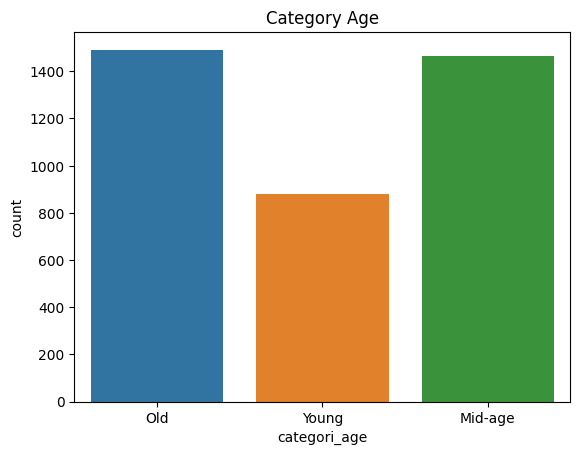

In [ ]:
# Melihat bagaimana perbandingan cantegory age
sns.countplot(data=df, x='categori_age', palette='tab10')
plt.title('Category Age')

In [ ]:
buy_gender = df['Gender'].value_counts()
buy_gender

,count
Gender,
Male,2652
Female,1248


<ipython-input-45-a39195ceca9e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='tab10')


Text(0.5, 1.0, 'Siapakah yg memilki lebih banyak pembelian?')

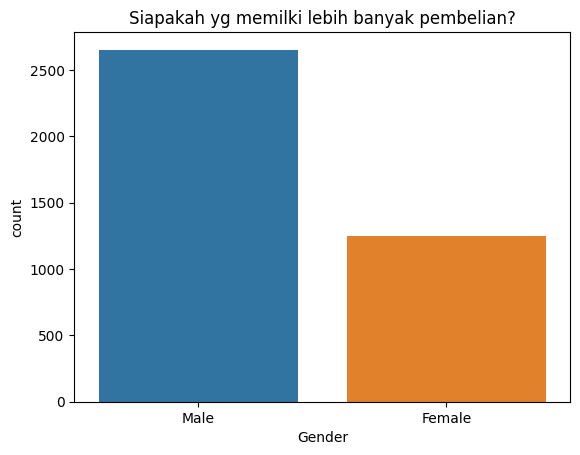

In [ ]:
sns.countplot(data=df, x='Gender', palette='tab10')
plt.title('Siapakah yg memilki lebih banyak pembelian?')

<ipython-input-22-e33ea5c4d06e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_buy.index, y=category_buy.values, palette='tab10')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

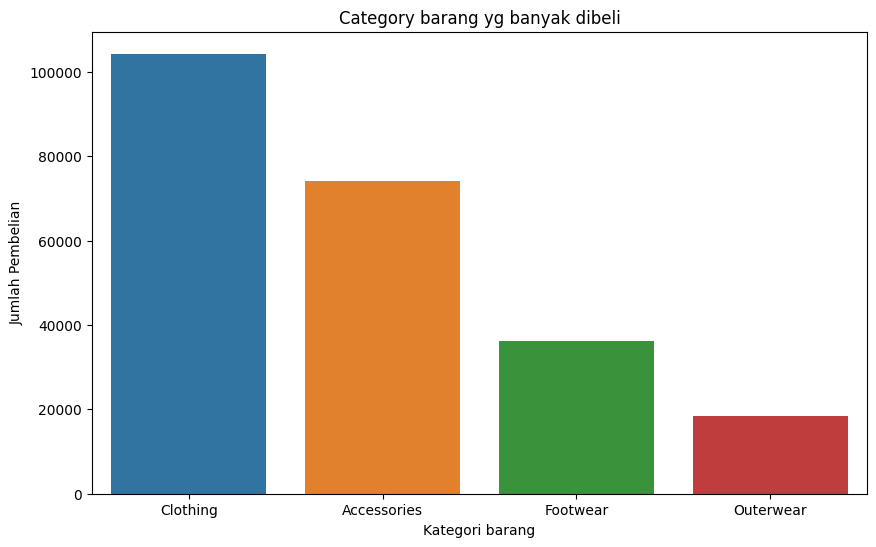

In [ ]:
# Category barang yg banyak di beli
category_buy = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=category_buy.index, y=category_buy.values, palette='tab10')
plt.title('Category barang yg banyak dibeli')
plt.xlabel('Kategori barang')
plt.ylabel('Jumlah Pembelian')
plt.show()

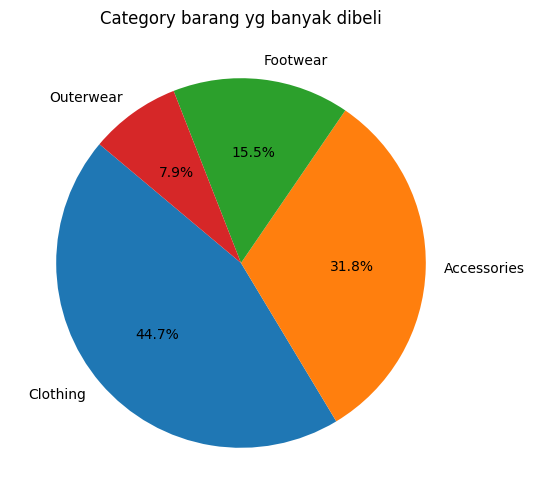

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(category_buy, labels=category_buy.index, autopct='%1.1f%%', startangle=140)
plt.title('Category barang yg banyak dibeli')
plt.show()